In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

X, y


(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [4]:
import numpy as np
import pandas as pd

irisdf = pd.DataFrame(
    np.hstack((X, y[:, np.newaxis])),
    columns=["花萼长度", "花萼宽度",
             "花瓣长度", "花瓣宽度", "类别"]
)
kind_dict = {0: "山鸢尾", 1: "杂色鸢尾", 2: "维吉尼亚鸢尾"}
irisdf["类别"] = irisdf["类别"].map(kind_dict)

irisdf.head()


,花萼长度,花萼宽度,花瓣长度,花瓣宽度,类别
0,5.1,3.5,1.4,0.2,山鸢尾
1,4.9,3.0,1.4,0.2,山鸢尾
2,4.7,3.2,1.3,0.2,山鸢尾
3,4.6,3.1,1.5,0.2,山鸢尾
4,5.0,3.6,1.4,0.2,山鸢尾


In [5]:
irisdf.describe()


,花萼长度,花萼宽度,花瓣长度,花瓣宽度
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


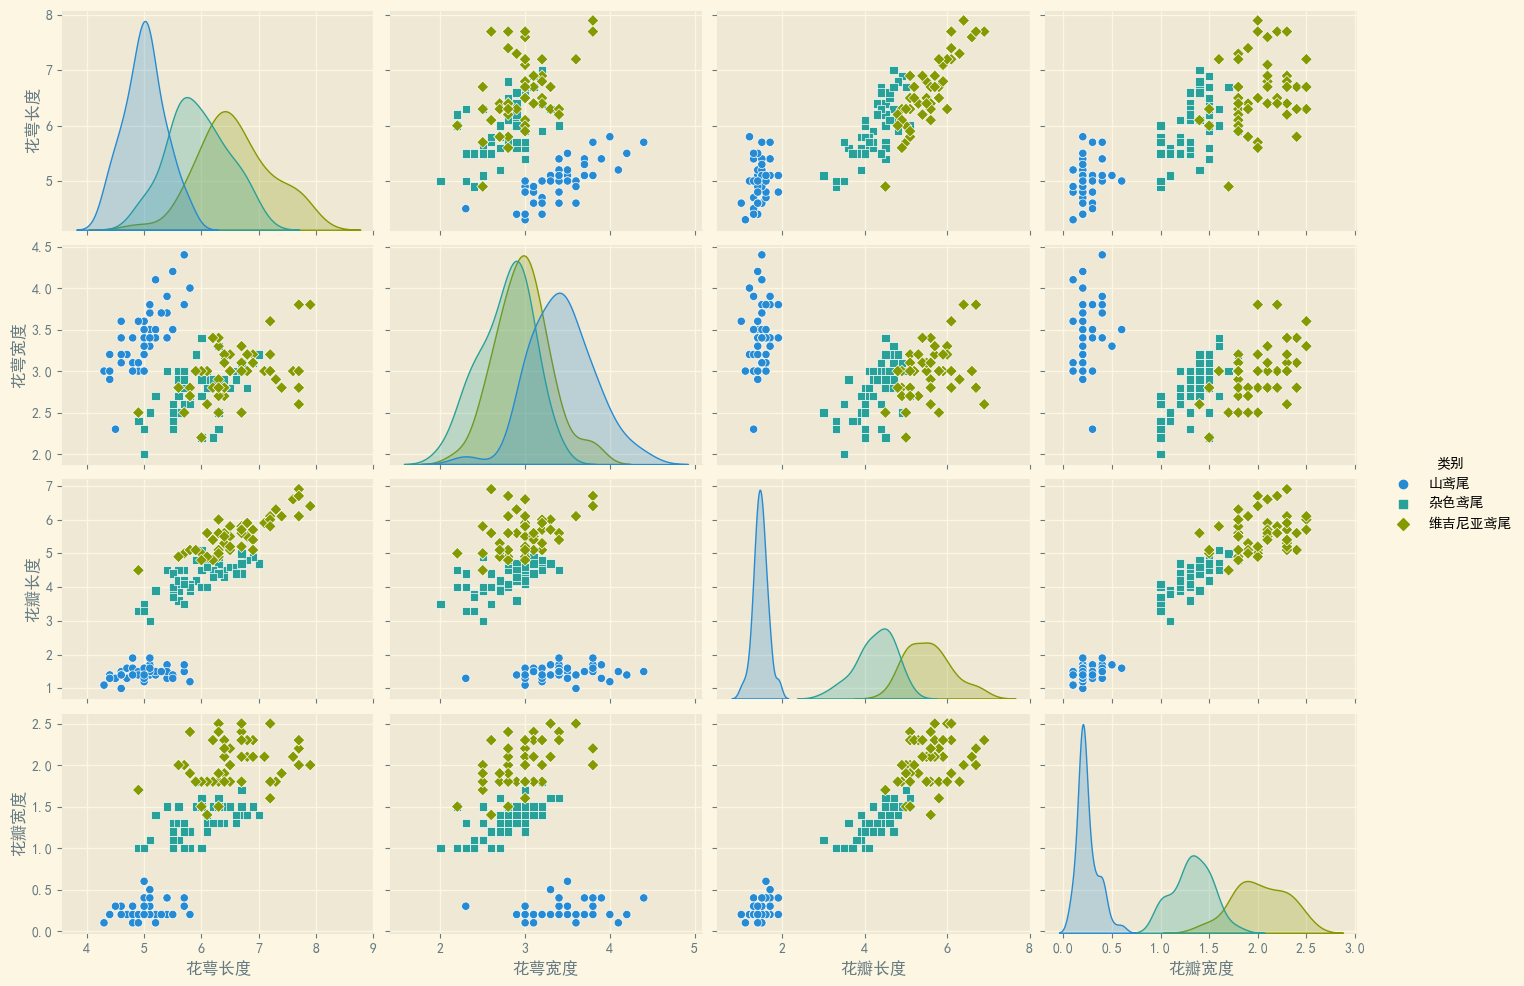

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.sans-serif"]=["SimHei"]

with plt.style.context('Solarize_Light2'):
    g = sns.pairplot(irisdf, diag_kind="kde", kind="scatter", hue="类别", aspect=1.4, markers=["o", "s", "D"])
    plt.show()


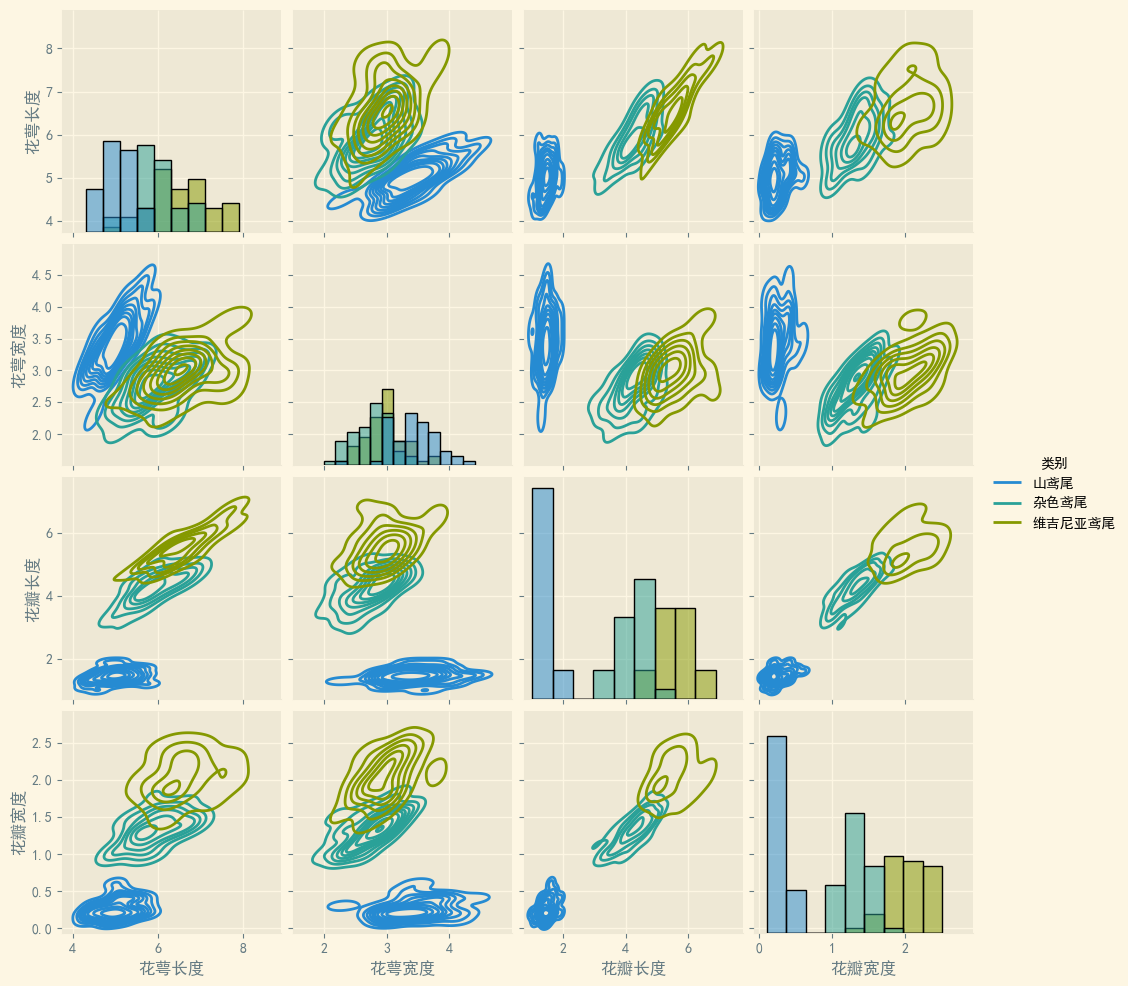

In [9]:
with plt.style.context('Solarize_Light2'):
    g = sns.pairplot(irisdf, diag_kind="hist", kind="kde", hue="类别")
    plt.show()


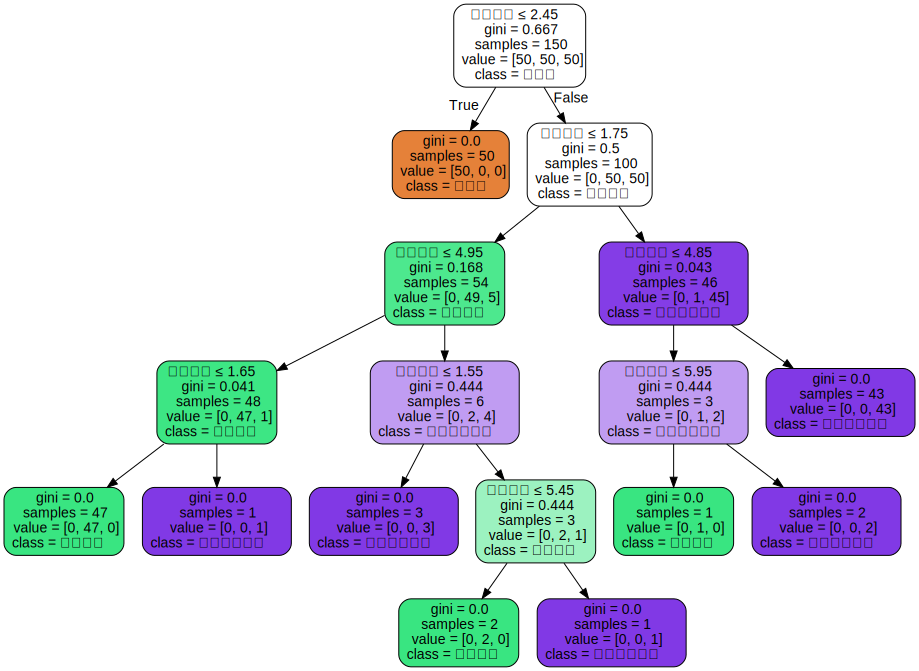

In [11]:
from sklearn import tree
import graphviz 

kind_dict = {"sepal length (cm)": "花萼长度", "sepal width (cm)": "花萼宽度", "petal length (cm)": "花瓣长度", "petal width (cm)": "花瓣宽度"}
iris.feature_names = list(map(kind_dict.get, iris.feature_names))

kind_dict = {"setosa": "山鸢尾", "versicolor": "杂色鸢尾", "virginica": "维吉尼亚鸢尾"}
iris.target_names = list(map(kind_dict.get, iris.target_names))

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True, special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

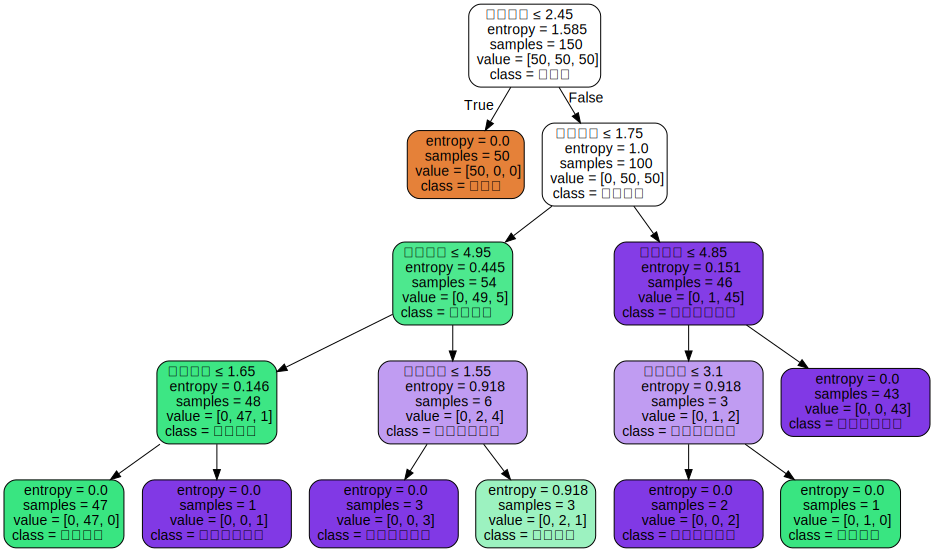

In [12]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf = clf.fit(X, y)
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True, special_characters=True) 
graph = graphviz.Source(dot_data) 
graph